This notebook is referred from [this kernel](https://www.kaggle.com/drouholi/mnist-mlp) and [this kernel](https://www.kaggle.com/adityaecdrid/mnist-with-keras-for-beginners-99457).

We are going to build a simple Multi Layer Perceptron for MNIST digit classification.

**Data analysis**

In [34]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

Load the train and test dataset

In [35]:
#load the data
train_data = pd.read_csv("../input/train.csv")
test_data = pd.read_csv("../input/test.csv")

#reshape the train and test data
X_train = (train_data.ix[:,1:].values).astype('float32')
#data labels
y_train = train_data.ix[:,0].values.astype('int32')
#test data
X_test = test_data.astype('float32')

print("The MNIST dataset has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

The MNIST dataset has a training set of 42000 examples.
The MNIST database has a test set of 28000 examples.


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


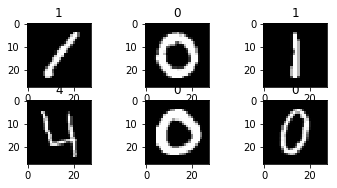

In [36]:
#Convert training data to img format 
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_train.shape
X_test = X_test.values.reshape(-1, 28, 28,1)
X_test.shape
for i in range(6):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

Visualize the image

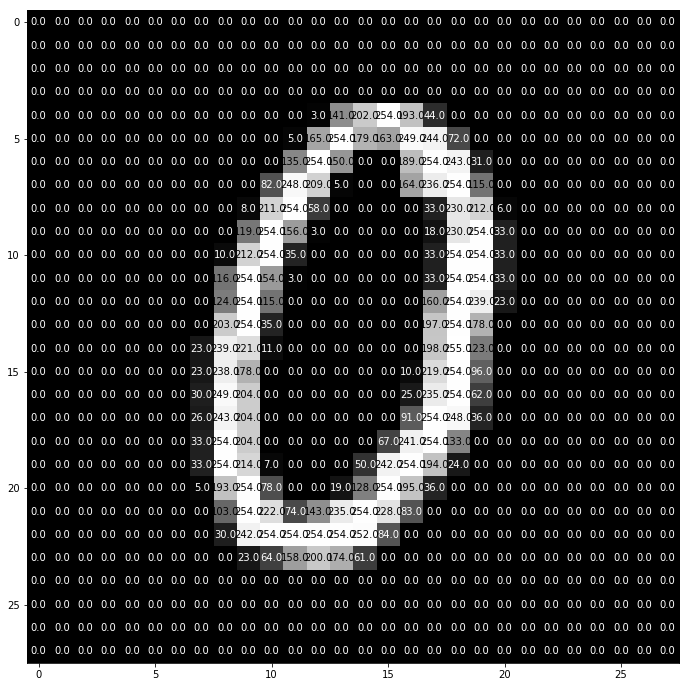

In [37]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[5], ax)

In [38]:
#reshape the image and expand to 1 dimension
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_train.shape

(42000, 28, 28, 1)

In [39]:
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_test.shape

(28000, 28, 28, 1)

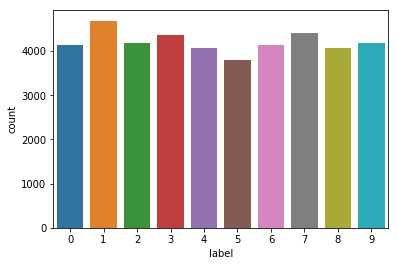

In [40]:
import seaborn as sns
sns.countplot(train_data['label'])

In [41]:
#normalize the image
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 

**Split into train and test data**
One hot encoding for the labels

In [42]:
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
# Set the random seed
random_seed = 2
# Split the train and the validation set for the fitting
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=random_seed)
# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_val = np_utils.to_categorical(y_val, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[8 7 9 3 5 1 3 1 0 3]
One-hot labels:
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


**Build the model**

In [43]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation


model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_7 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_8 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
__________

In [44]:
#train the data
from keras.callbacks import ModelCheckpoint

batch_size = 64
nb_epoch = 20
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, epochs=nb_epoch, batch_size=batch_size, validation_split=0.2, callbacks=[checkpointer],verbose=1, shuffle=True)

Train on 30240 samples, validate on 7560 samples
Epoch 1/20
30240/30240 [==============================] - 3s 114us/step - loss: 0.2851 - acc: 0.9129 - val_loss: 0.1286 - val_acc: 0.9593

Epoch 00001: val_loss improved from inf to 0.12856, saving model to mnist.model.best.hdf5
Epoch 2/20
30240/30240 [==============================] - 2s 81us/step - loss: 0.1228 - acc: 0.9628 - val_loss: 0.1196 - val_acc: 0.9647

Epoch 00002: val_loss improved from 0.12856 to 0.11957, saving model to mnist.model.best.hdf5
Epoch 3/20
30240/30240 [==============================] - 3s 86us/step - loss: 0.0827 - acc: 0.9750 - val_loss: 0.1038 - val_acc: 0.9718

Epoch 00003: val_loss improved from 0.11957 to 0.10376, saving model to mnist.model.best.hdf5
Epoch 4/20
30240/30240 [==============================] - 3s 91us/step - loss: 0.0664 - acc: 0.9798 - val_loss: 0.1047 - val_acc: 0.9731

Epoch 00004: val_loss did not improve from 0.10376
Epoch 5/20
30240/30240 [==============================] - 3s 89us/ste

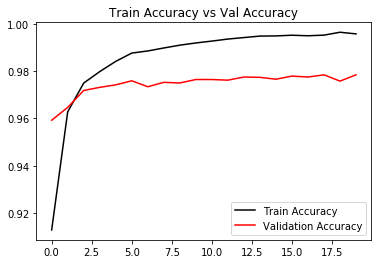

In [45]:
plt.title('Train Accuracy vs Val Accuracy')
plt.plot(hist.history['acc'], label='Train Accuracy', color='black')
plt.plot(hist.history['val_acc'], label='Validation Accuracy', color='red')
plt.legend()
plt.show()

In [46]:
# evaluate test accuracy

from keras.models import load_model

model = load_model('mnist.model.best.hdf5')
score = model.evaluate(X_val, y_val, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Validation accuracy: %.4f%%' % accuracy)

Validation accuracy: 97.1429%


**Submit the test prediction**

In [47]:
predictions = model.predict_classes(X_test, verbose=1)

submissions = pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                            "Label": predictions})
submissions.to_csv("mnist_CNN_test.csv",index=False)

28000/28000 [==============================] - 2s 59us/step
